<a href="https://colab.research.google.com/github/Gabrieldiasdeoliveira/6sigma/blob/main/C%C3%B3pia_de_6sigma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

:# Projeto estatistico para redução de custos e melhorias de processos, atráves da metódologia 6 sigma com DMAIC para dados financeiros da empresa.

##Etapas do Projeto

**Definir:** *Nessa fase, o problema a ser resolvido é claramente definido,
incluindo os objetivos e metas a serem alcançados;*

**Medir:** *Nessa fase, são coletados dados sobre o processo existente para entender como ele funciona atualmente;*

**Analisar:** *Nessa fase, os dados coletados são analisados para identificar as principais causas do problema e as oportunidades de melhoria;*

**Melhorar:** *Nessa fase, soluções são desenvolvidas e implementadas para corrigir as causas identificadas e melhorar o processo;*

**Controlar:** *Nessa fase, medidas são implementadas para garantir que o processo permaneça em um estado de melhoria contínua e que os objetivos e metas estabelecidos sejam alcançados e mantidos.*

**Definir:** *Uma empresa de tecnologia está em busca de melhorias nos seus processos financeiros. Foram disponibilizados os dados financeiros da empresa para análise estatística e, a partir disso, serão aplicadas algumas metodologias estatísticas para tomada de decisão. Eles observaram que existe um problema entre o valor de orçamento previsto e os custos de determinadas atividades. Muitas vezes, os custos ficavam acima do planejado, mas isso só era observado quando se fazia um fechamento geral das contas anualmente, gerando muito impacto na saúde financeira da companhia. O problema foi então passado para o time de estatísticos da empresa, cujo objetivo é melhorar ou criar processos da área para prevenir a perdas.
Então foi definido pelo time de especialista que além das tecnicas estatiticas para analise de dados, utilizaremos a metodologia DMAIC e 6 sigma.*


**Medir:** *Coleta e Geração de dados*

In [ ]:
#Gerando dados aleatórios de Custo e Orçamento
custo_funcionario <- rnorm(13, mean = 70000, sd = 3500)
custo_infraestrutura <- rnorm(13, mean = 8000, sd = 400)
custo_tecnologia <- rnorm(13, mean = 26000, sd = 1300)
custo_marketing <- rnorm(13, mean = 9000, sd = 450)
orcamento_funcionario <- rnorm(13, mean = 85000, sd = 3250)
orcamento_infraestrutura <- rnorm(13, mean = 10000, sd = 500)
orcameno_tecnologia <- rnorm(13, mean = 25000, sd = 1250)
orcamento_marketing <- rnorm(13, mean = 8000, sd = 400)

In [ ]:
#Período
meses <- seq(as.Date("2022/03/02"), as.Date("2023/03/03"), by = "month")
meses <- format(meses, "%m-%y")
meses

[1] "03-22" "04-22" "05-22" "06-22" "07-22" "08-22" "09-22" "10-22" "11-22"
[10] "12-22" "01-23" "02-23" "03-23"

In [ ]:
#Período
meses <- seq(as.Date("2022/03/02"), as.Date("2023/03/03"), by = "month")
meses <- format(meses, "%b-%y")
meses

[1] "Mar-22" "Apr-22" "May-22" "Jun-22" "Jul-22" "Aug-22" "Sep-22" "Oct-22"
 [9] "Nov-22" "Dec-22" "Jan-23" "Feb-23" "Mar-23"

In [ ]:
# Criação e visualização da base de dados
dados <- data.frame(
  Custo_com_funcionario = custo_funcionario,
  Custo_de_infraestrutura = custo_infraestrutura,
  Custo_de_tecnologia = custo_tecnologia,
  Custo_de_marketing = custo_marketing,
  Orcamento_funcionario = orcamento_funcionario,
  Orcamento_infraestrutura = orcamento_infraestrutura,
  Orcameno_tecnologia = orcameno_tecnologia,
  Orcamento_marketing = orcamento_marketing,
  Mes = meses
)
head(dados)
dim(dados)

,Custo_com_funcionario,Custo_de_infraestrutura,Custo_de_tecnologia,Custo_de_marketing,Orcamento_funcionario,Orcamento_infraestrutura,Orcameno_tecnologia,Orcamento_marketing,Mes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,67885.50,7754.375,26114.50,8539.730,86189.43,11186.937,24547.61,8063.611,03-22
2,68330.67,8564.943,26253.70,8765.110,84316.69,11491.578,24456.77,8476.643,04-22
3,68107.54,7952.196,25103.43,8568.138,87532.20,10426.534,25857.25,7843.796,05-22
4,76347.08,8269.387,26223.30,9473.985,87710.05,10433.659,23401.23,8186.058,06-22
5,69024.74,7908.587,23864.05,9910.048,83137.85,9743.518,25753.58,8069.640,07-22
6,69641.25,7788.366,25454.96,9856.489,82595.82,10926.285,26357.71,8170.018,08-22


[1] 13  9

In [ ]:
library(dplyr)

In [ ]:
# Adição de duas novas colunas com a soma do Orçamento e do Custo
dados <- dados %>%
  mutate(Custo_total = rowSums(select(., starts_with("Custo"))),
         Orcamento_total = rowSums(select(., starts_with("Orcamento"))))

head(dados)


,Custo_com_funcionario,Custo_de_infraestrutura,Custo_de_tecnologia,Custo_de_marketing,Orcamento_funcionario,Orcamento_infraestrutura,Orcameno_tecnologia,Orcamento_marketing,Mes,Custo_total,Orcamento_total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,67885.50,7754.375,26114.50,8539.730,86189.43,11186.937,24547.61,8063.611,03-22,110294.1,105440.0
2,68330.67,8564.943,26253.70,8765.110,84316.69,11491.578,24456.77,8476.643,04-22,111914.4,104284.9
3,68107.54,7952.196,25103.43,8568.138,87532.20,10426.534,25857.25,7843.796,05-22,109731.3,105802.5
4,76347.08,8269.387,26223.30,9473.985,87710.05,10433.659,23401.23,8186.058,06-22,120313.8,106329.8
5,69024.74,7908.587,23864.05,9910.048,83137.85,9743.518,25753.58,8069.640,07-22,110707.4,100951.0
6,69641.25,7788.366,25454.96,9856.489,82595.82,10926.285,26357.71,8170.018,08-22,112741.1,101692.1


**Analisar:** *Nessa fase, os dados coletados são analisados para identificar as principais causas do problema e as oportunidades de melhoria;*


*Foram escolhidas as variaveis Custo e Orçamento total, apenas para fim de estudo.*

In [ ]:
dados <- dados %>%
  arrange(Mes)
head(dados)

,Custo_com_funcionario,Custo_de_infraestrutura,Custo_de_tecnologia,Custo_de_marketing,Orcamento_funcionario,Orcamento_infraestrutura,Orcameno_tecnologia,Orcamento_marketing,Mes,Custo_total,Orcamento_total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,71099.78,7642.172,26191.31,8690.795,81278.74,9720.388,24362.95,7880.103,01-23,113624.1,98879.23
2,77370.06,7788.937,26445.95,8960.062,88899.66,10481.925,22845.51,7819.645,02-23,120565.0,107201.23
3,67885.50,7754.375,26114.50,8539.730,86189.43,11186.937,24547.61,8063.611,03-22,110294.1,105439.98
4,74421.47,7774.945,27271.91,9212.534,83601.84,10694.918,23620.29,8249.682,03-23,118680.9,102546.44
5,68330.67,8564.943,26253.70,8765.110,84316.69,11491.578,24456.77,8476.643,04-22,111914.4,104284.91
6,68107.54,7952.196,25103.43,8568.138,87532.20,10426.534,25857.25,7843.796,05-22,109731.3,105802.53


In [ ]:
library(ggplot2)

In [ ]:
base_resumo <- dados %>%
  select(Custo_total, Orcamento_total, Mes)


In [ ]:
summary(base_resumo$Custo_total)
summary(base_resumo$Orcamento_total)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 105950  110707  112864  113576  115530  120565 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  98879  101692  104203  103574  105803  107201 

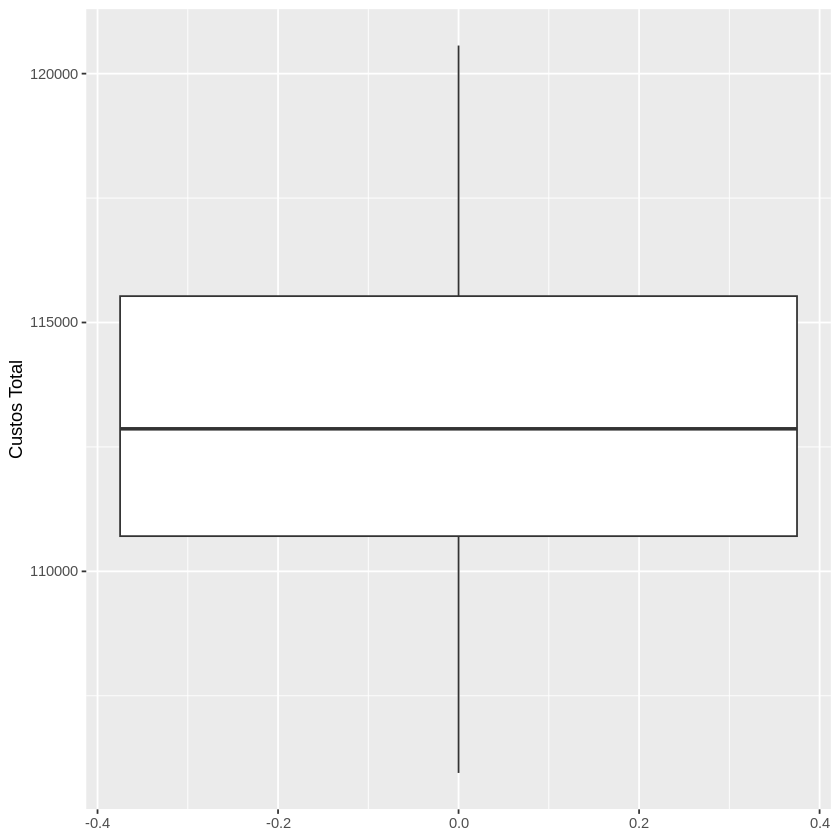

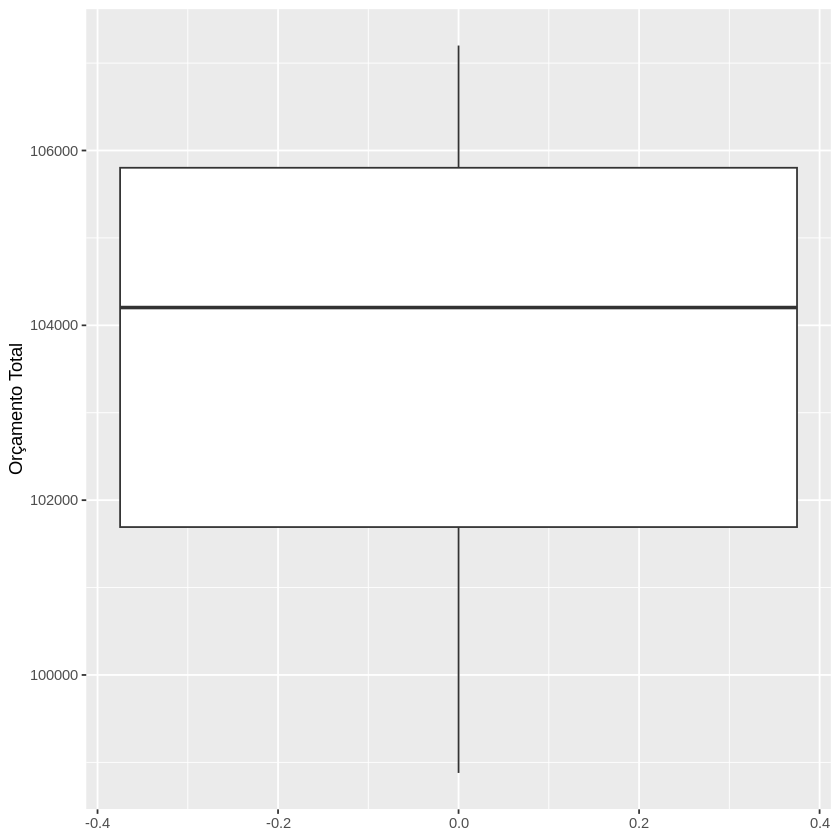

In [ ]:
# Boxplot para Custos_variaveis
ggplot(base_resumo, aes(y = Custo_total)) +
  geom_boxplot() +
  labs(y = "Custos Total")

# Boxplot para Orcamento_variavel
ggplot(base_resumo, aes(y = Orcamento_total)) +
  geom_boxplot() +
  labs(y = "Orçamento Total")

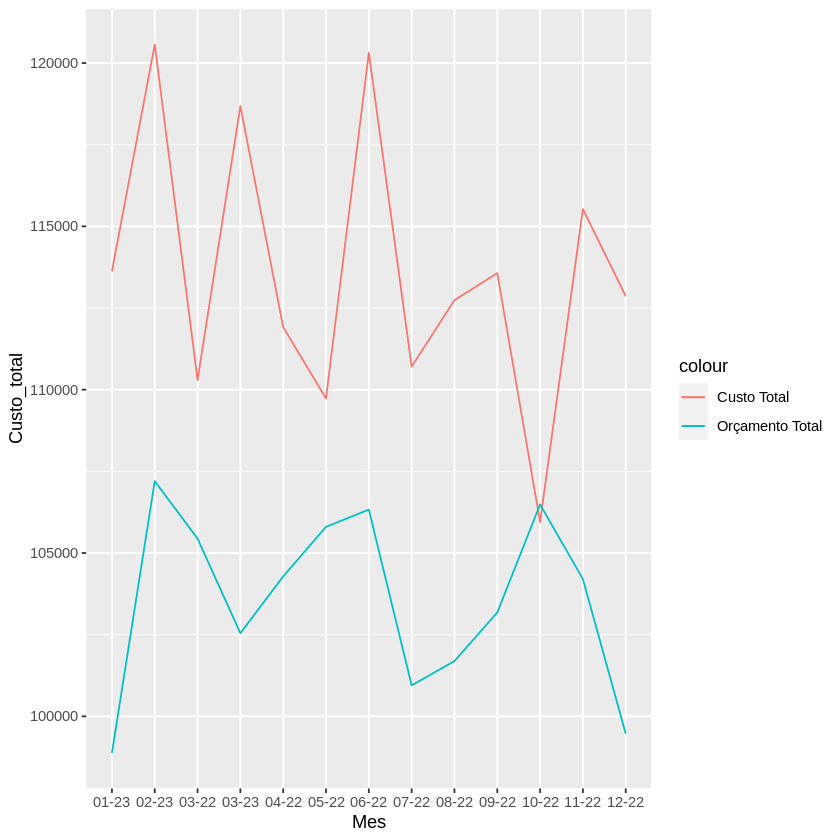

In [ ]:
ggplot(dados, aes(x = Mes)) +
  geom_line(aes(y = Custo_total, group = 1, col = "Custo Total")) +
  geom_line(aes(y = Orcamento_total, group = 1, col = "Orçamento Total"))


In [ ]:
# Calcular média e desvio padrão
media <- mean(base_resumo$Custo_total)
desvio <- sd(base_resumo$Custo_total)

# Calcular os limites de controle
limite_superior <- media + 4*desvio
limite_inferior <- media - 4*desvio



In [ ]:
base_resumo %>% filter(as.numeric(Mes) >= (max(as.numeric(Mes)) - 2))


In [ ]:
base_resumo$Mes <- as.numeric(as.character(base_resumo$Mes))


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [ ]:
# Selecionar apenas os últimos 3 meses
ultimos_tres_meses <- base_resumo %>%
  filter(Mes >= (max(Mes)-2))



In [ ]:
# Verificar se o custo total ficou acima do orçamento total nos últimos 3 meses
if (any(ultimos_tres_meses$Custo_total > ultimos_tres_meses$Orcamento_total)) {
  mensagem <- "Custo total ficou acima do orçamento total nos últimos 3 meses!"
} else {
  mensagem <- "Custo total não ficou acima do orçamento total nos últimos 3 meses."
}

# Imprimir mensagem
print(mensagem)

[1] "Custo total não ficou acima do orçamento total nos últimos 3 meses."


**Etapa 3 -** *Realizar uma análise de dados: Utilizar as informações geradas para realizar uma análise de dados exploratória e identificar as tendências, distribuições e padrões dos dados.*